In [31]:
from utils import set_root

import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt

set_root()

Current working directory: /home/guido/shared/github/physioex-private


In [8]:
import pandas as pd


# Define the function to convert booleans to LaTeX symbols
def boolean_to_latex_symbol(value):
    if value:
        return r"\checkmark"  # Tick symbol for True
    else:
        return r"\times"  # Cross symbol for False


# Initialize an empty list to collect data
data = []

datasets = [
    "shhs",
    "hpap",
    "mass",
    "dreem/dodo",
    "dreem/dodh",
    "mne_data",
    "dcsm",
    "mass",
    "hmc",
    "svuh",
    "isruc",
]

for dataset in datasets:
    # Read the CSV file for the current dataset
    table = pd.read_csv(f"/home/guido/shared/{dataset}/table.csv")

    # Calculate the number of participants
    num_participants = len(table)

    # Check for the presence of 'sex' and 'age' columns
    has_sex = "sex" in table.columns
    has_age = "age" in table.columns

    # Add the information to the data list
    data.append(
        {
            "Dataset": dataset,
            "Number of Participants": num_participants,
            "Sleep Stages": True,  # Presence of sleep stage annotations (true for all)
            "Sex": has_sex,
            "Age": has_age,
        }
    )

# Create the DataFrame new_table from the data list
new_table = pd.DataFrame(data)

# Apply the boolean_to_latex_symbol function to boolean columns
new_table["Sleep Stages"] = new_table["Sleep Stages"].apply(boolean_to_latex_symbol)
new_table["Sex"] = new_table["Sex"].apply(boolean_to_latex_symbol)
new_table["Age"] = new_table["Age"].apply(boolean_to_latex_symbol)

# Convert new_table to LaTeX format
latex_table = new_table.to_latex(index=False, escape=False)

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrlll}
\toprule
Dataset & Number of Participants & Sleep Stages & Sex & Age \\
\midrule
shhs & 5463 & \checkmark & \times & \times \\
hpap & 247 & \checkmark & \checkmark & \checkmark \\
mass & 200 & \checkmark & \times & \times \\
dreem/dodo & 56 & \checkmark & \times & \times \\
dreem/dodh & 25 & \checkmark & \times & \times \\
mne_data & 78 & \checkmark & \checkmark & \checkmark \\
dcsm & 255 & \checkmark & \times & \times \\
mass & 200 & \checkmark & \times & \times \\
hmc & 151 & \checkmark & \times & \times \\
svuh & 25 & \checkmark & \checkmark & \checkmark \\
isruc & 109 & \checkmark & \checkmark & \checkmark \\
\bottomrule
\end{tabular}



results with k=8

In [9]:
kappa = list(range(9))

results_df = pd.DataFrame()

for k in kappa:

    results_path = f"models/backup_msd/k={k}/"

    # list all the files in the directory and its subtree
    files = [
        os.path.join(dp, f)
        for dp, dn, fn in os.walk(os.path.expanduser(results_path))
        for f in fn
    ]
    files = [f for f in files if f.endswith("test_results.csv")]

    for file in files:
        df = pd.read_csv(file)  # .drop(columns=['Unnamed: 0'])
        df["k"] = k
        if k == 0:
            df["train_domain"] = "shhs"
        else:
            df["train_domain"] = file.replace(f"models/backup_msd/k={k}/", "").split(
                "/"
            )[0]

        results_df = pd.concat([results_df, df], ignore_index=True)

print(results_df)

     test_loss  test_acc   test_f1   test_ck   test_pr   test_rc  k  \
0     0.816263  0.727514  0.719849  0.623614  0.729708  0.727514  0   
1     1.038833  0.710758  0.700942  0.589354  0.715083  0.710758  1   
2     1.223339  0.684745  0.698592  0.569350  0.723349  0.684745  1   
3     1.310361  0.621086  0.633352  0.494871  0.708438  0.621086  1   
4     1.321661  0.619068  0.616710  0.479373  0.692848  0.619068  1   
..         ...       ...       ...       ...       ...       ... ..   
251   1.259684  0.635971  0.622316  0.493422  0.801668  0.635971  7   
252   1.568411  0.550136  0.538521  0.412646  0.592135  0.550136  7   
253   0.718331  0.728657  0.730546  0.622725  0.752989  0.728657  7   
254   0.266060  0.898600  0.896088  0.857567  0.903523  0.898600  7   
255   0.392863  0.851388  0.846824  0.791838  0.845876  0.851388  8   

                                          train_domain  fold  
0                                                 shhs   NaN  
1                    

In [31]:
kappa = list(range(8))

new_results_df = pd.DataFrame()

for k in kappa:

    results_path = f"models/msd/k={k}/"

    # list all the files in the directory and its subtree
    files = [
        os.path.join(dp, f)
        for dp, dn, fn in os.walk(os.path.expanduser(results_path))
        for f in fn
    ]
    files = [f for f in files if f.endswith("test_results.csv")]

    for file in files:
        df = pd.read_csv(file)  # .drop(columns=['Unnamed: 0'])
        df["k"] = k
        if k == 0:
            df["train_domain"] = "shhs"
        else:
            df["train_domain"] = file.replace(f"models/msd/k={k}/", "").split("/")[0]

        new_results_df = pd.concat([new_results_df, df], ignore_index=True)

new_results_df = new_results_df[
    new_results_df["train_domain"].str.contains("dreemv.dodh") == False
]

print(new_results_df)

     test_loss  test_acc   test_f1   test_ck   test_pr   test_rc  k  \
0     0.816263  0.727514  0.719849  0.623614  0.729708  0.727514  0   
1     1.062665  0.702478  0.692169  0.580688  0.706704  0.702478  1   
2     1.239233  0.681356  0.695711  0.563753  0.721395  0.681356  1   
3     1.353907  0.613264  0.626144  0.483354  0.699375  0.613264  1   
5     0.924053  0.677940  0.688436  0.568093  0.718200  0.677940  1   
..         ...       ...       ...       ...       ...       ... ..   
236   1.200182  0.623713  0.622742  0.482445  0.812796  0.623713  6   
240   0.687436  0.726272  0.716713  0.634618  0.741342  0.726272  6   
241   1.422959  0.595979  0.576095  0.467642  0.636343  0.595979  6   
243   1.340101  0.650411  0.674605  0.498120  0.771233  0.650411  6   
249   0.385161  0.855406  0.849664  0.796166  0.849073  0.855406  7   

                                          train_domain  fold  
0                                                 shhs   NaN  
1                    

In [10]:
results_7 = results_df[results_df["k"] == 7]

tr_domains = results_7["train_domain"].values
train_domains = []

for domains in tr_domains:
    domains = domains.split("-")
    for domain in domains:
        if domain not in train_domains:
            train_domains.append(domain)

# calcola quali sono i domini a cui sono associate le performance peggiori e migliori

# ordina gli elementi di results_7 per accuracy incrementale
results_7 = results_7.sort_values(by="test_acc", ascending=True)
weights = np.zeros(8)
for row in results_7.iterrows():
    row = row[1]
    domains = row["train_domain"].split("-")
    for domain in domains:
        weights[train_domains.index(domain)] += row["test_acc"]

# order the domains by the weights and print the ranking
ranking = np.argsort(weights)
print("Ranking of the domains:")
for rank in ranking:
    print(f"{train_domains[rank]}: {weights[rank]}")

Ranking of the domains:
dreemv.dodh: 4.639151036739349
sleep_edfv.None: 4.782352924346924
hmcv.None: 4.806930780410767
mass: 4.809094071388245
dreemv.dodo: 4.90177994966507
dcsmv.None: 4.9109508991241455
svuhv.None: 4.926384091377258
isrucv.None: 4.9876150488853455


/tmp/ipykernel_3953864/997468753.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(
/tmp/ipykernel_3953864/997468753.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax1 = sns.lineplot(


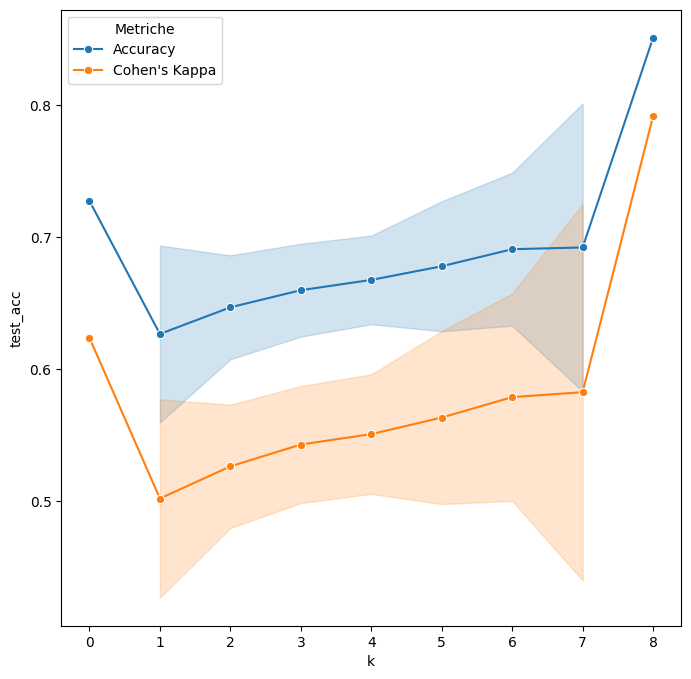

In [11]:
plt.figure(figsize=(8, 8))

# Plot due linee con etichette specificate per la legenda
ax = sns.lineplot(
    x="k", y="test_acc", data=results_df, ci="sd", marker="o", label="Accuracy"
)
ax1 = sns.lineplot(
    x="k", y="test_ck", data=results_df, ci="sd", marker="o", label="Cohen's Kappa"
)

# Mostra la legenda con le etichette corrette
plt.legend(title="Metriche")

# Mostra il grafico
plt.show()

/tmp/ipykernel_3953864/1357303991.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(
/tmp/ipykernel_3953864/1357303991.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax1 = sns.lineplot(


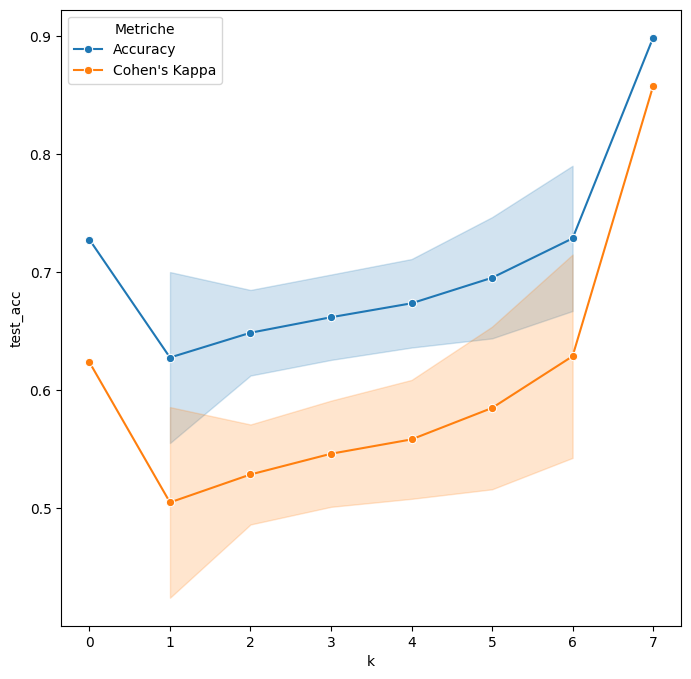

In [12]:
#
new_results_df = results_df[
    results_df["train_domain"].str.contains("dreemv.dodh") == False
]

plt.figure(figsize=(8, 8))

# Plot due linee con etichette specificate per la legenda
ax = sns.lineplot(
    x="k", y="test_acc", data=new_results_df, ci="sd", marker="o", label="Accuracy"
)
ax1 = sns.lineplot(
    x="k", y="test_ck", data=new_results_df, ci="sd", marker="o", label="Cohen's Kappa"
)

# Mostra la legenda con le etichette corrette
plt.legend(title="Metriche")

# Mostra il grafico
plt.show()

In [13]:
kappa = list(range(9))

results_df = pd.DataFrame()

for k in kappa:

    results_path = f"models/backup_msd_age/k={k}/"

    # list all the files in the directory and its subtree
    files = [
        os.path.join(dp, f)
        for dp, dn, fn in os.walk(os.path.expanduser(results_path))
        for f in fn
    ]
    files = [f for f in files if f.endswith("test_results.csv")]

    for file in files:
        df = pd.read_csv(file)  # .drop(columns=['Unnamed: 0'])
        df["k"] = k
        if k == 0:
            df["train_domain"] = "hpapv.None"
        else:
            df["train_domain"] = file.replace(
                f"models/backup_msd_age/k={k}/", ""
            ).split("/")[0]

        results_df = pd.concat([results_df, df], ignore_index=True)

print(results_df)

   test_loss   test_acc  test_mae    test_r2  fold  k  \
0   0.056872  17.627853  0.189010  -0.813861     0  0   
1   0.066591  15.062522  0.204091  -0.500824     0  1   
2   0.038264  26.196621  0.163064  -0.254934     0  1   
3   0.050355  19.896589  0.185779  -1.940849     0  1   
4   0.052858  18.965528  0.185544 -22.908331     0  2   
5   0.071349  14.067450  0.218598  -0.438184     0  2   
6   0.050299  19.952230  0.184233  -1.592146     0  2   
7   0.020165  49.774204  0.114715   0.089917     0  3   

                             train_domain  
0                              hpapv.None  
1                             isrucv.None  
2                              svuhv.None  
3                         sleep_edfv.None  
4             isrucv.None-sleep_edfv.None  
5                  isrucv.None-svuhv.None  
6              svuhv.None-sleep_edfv.None  
7  isrucv.None-svuhv.None-sleep_edfv.None  


/tmp/ipykernel_3953864/2679362666.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(
/tmp/ipykernel_3953864/2679362666.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(


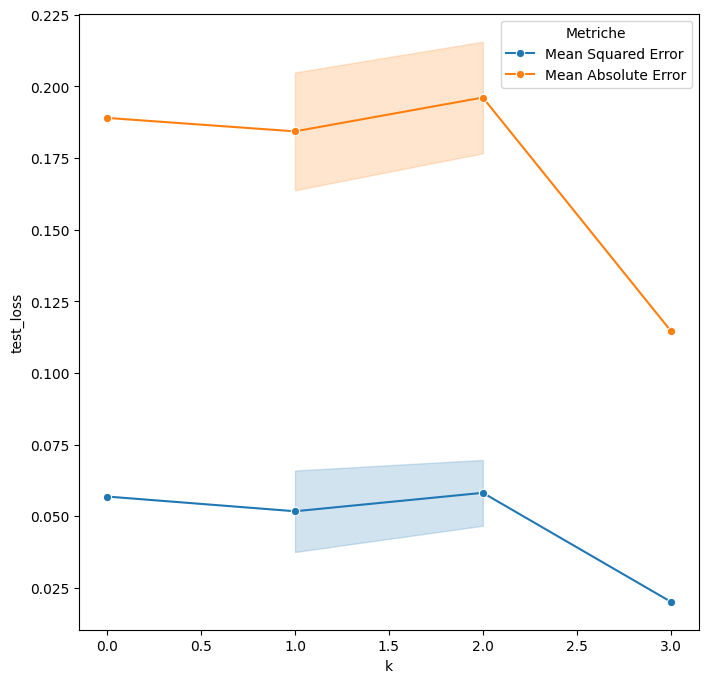

In [16]:
plt.figure(figsize=(8, 8))

# Plot due linee con etichette specificate per la legenda
ax = sns.lineplot(
    x="k",
    y="test_loss",
    data=results_df,
    ci="sd",
    marker="o",
    label="Mean Squared Error",
)
ax = sns.lineplot(
    x="k",
    y="test_mae",
    data=results_df,
    ci="sd",
    marker="o",
    label="Mean Absolute Error",
)

# Mostra la legenda con le etichette corrette
plt.legend(title="Metriche")

# Mostra il grafico
plt.show()

/tmp/ipykernel_2356008/887251117.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="k", y="silhouette_score", data=clustering_results, ci="sd", marker="o", ax=axes[0])
/tmp/ipykernel_2356008/887251117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="k", y="davies_bouldin_score", data=clustering_results, ci="sd", marker="o", ax=axes[1])
/tmp/ipykernel_2356008/887251117.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="k", y="calinski_harabasz_score", data=clustering_results, ci="sd", marker="o", ax=axes[2])


<Axes: xlabel='k', ylabel='calinski_harabasz_score'>

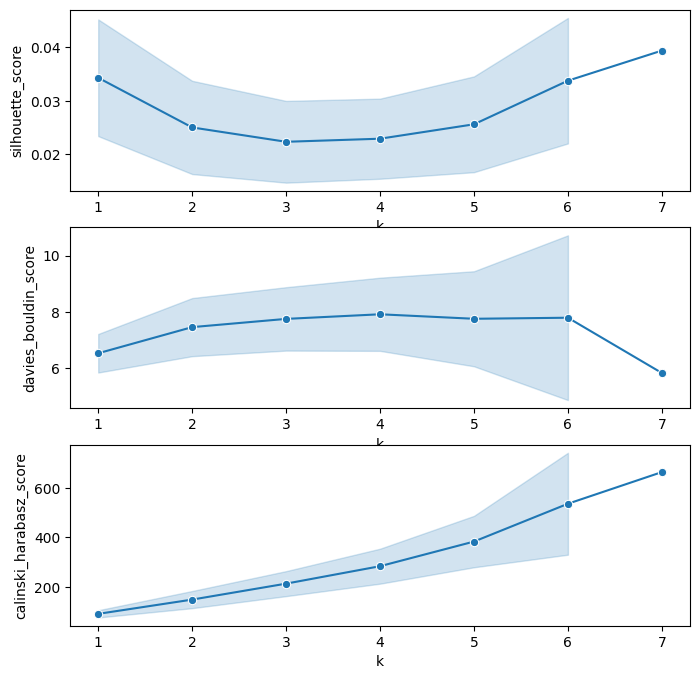

In [17]:
clustering_results = pd.read_csv("models/backup_msd/embeddings_similarity.csv")
clustering_results = clustering_results[
    clustering_results["train_domain"].str.contains(train_domains[ranking[0]]) == False
]

figure, axes = plt.subplots(3, 1, figsize=(8, 8))

sns.lineplot(
    x="k",
    y="silhouette_score",
    data=clustering_results,
    ci="sd",
    marker="o",
    ax=axes[0],
)
sns.lineplot(
    x="k",
    y="davies_bouldin_score",
    data=clustering_results,
    ci="sd",
    marker="o",
    ax=axes[1],
)
sns.lineplot(
    x="k",
    y="calinski_harabasz_score",
    data=clustering_results,
    ci="sd",
    marker="o",
    ax=axes[2],
)

In [75]:
# visualize the projections of the embeddings:

from physioex.data.base import TimeDistributedModule
from physioex.data import MultiSourceDomain as MSD
from physioex.models import load_pretrained_model

from pathlib import Path
from loguru import logger

import torch
from tqdm import tqdm

from physioex.data.constant import set_data_folder
from physioex.train.networks import config

set_data_folder("/home/guido/shared/")

sequence_length = 21


def encode(model, x, device):
    batch, L, nchan, T, F = x.size()

    x = x.reshape(-1, nchan, T, F)

    x = model.epoch_encoder(x.to(device)).detach().cpu()

    x = x.reshape(batch, L, -1)

    return x


domains = [
    {
        "dataset": "hpap",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "dcsm",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "isruc",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "svuh",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "mass",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "dreem",
        "version": "dodh",
        "picks": ["EEG"],
    },
    {
        "dataset": "dreem",
        "version": "dodo",
        "picks": ["EEG"],
    },
    {
        "dataset": "sleep_edf",
        "version": "None",
        "picks": ["EEG"],
    },
    {
        "dataset": "hmc",
        "version": "None",
        "picks": ["EEG"],
    },
]


def get_embeddings(train_domain, test_domain, sequence_length):
    k = len(train_domain)

    train_dataset = MSD(
        domains=train_domain,
        preprocessing="xsleepnet",
        sequence_length=sequence_length,
        target_transform=None,
        num_folds=1,
    )

    if len(test_domain) != 0:
        test_dataset = MSD(
            domains=test_domain,
            preprocessing="xsleepnet",
            sequence_length=sequence_length,
            target_transform=None,
            num_folds=1,
        )
    else:
        test_dataset = train_dataset

    train_domain_names = ""
    for domain in train_domain:
        train_domain_names += domain["dataset"]
        train_domain_names += (
            "v." + domain["version"] if domain["version"] is not None else ""
        )

        if domain != train_domain[-1]:
            train_domain_names += "-"

    results_path = f"models/msd/k={k}/{train_domain_names}/"
    # find the pretrained model in the results path
    list_of_files = list(Path(results_path).rglob("*.ckpt"))
    if len(list_of_files) == 0:
        logger.error(f"Model not found in {results_path}")

    logger.info("Loading the model...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = load_pretrained_model(name="seqsleepnet")
    model = (
        type(model)
        .load_from_checkpoint(
            list_of_files[0], module_config=config["seqsleepnet"]["module_config"]
        )
        .eval()
    )
    model = model.to(device)

    logger.info("Extracting dataloaders ...")

    train_dataset.split(0)
    test_dataset.split(0)

    train_datamodule = TimeDistributedModule(
        dataset=train_dataset,
        batch_size=128,
        fold=0,
    )

    test_datamodule = TimeDistributedModule(
        dataset=test_dataset,
        batch_size=128,
        fold=0,
    )

    train_dataloader = train_datamodule.train_dataloader()
    test_dataloader = test_datamodule.test_dataloader()

    # consider k * self.batch_size samples to extract the embeddings

    logger.info("Extracting embeddings from train domain...")
    train_embeddings, train_labels = [], []
    k_iter = 10
    for batch in tqdm(train_dataloader, desc="Train domain", total=k):
        X, y = batch
        batch_size = X.size(0)

        embeddings = encode(model.nn, X, device)

        embeddings = embeddings.cpu().detach().numpy()

        embeddings = np.reshape(embeddings, (batch_size * sequence_length, -1))

        train_embeddings.extend(embeddings)
        train_labels.extend(np.reshape(y, -1))

        k_iter -= 1
        if k_iter <= 0:
            break
    train_embeddings = np.array(train_embeddings)
    test_labels = np.array(train_labels)

    logger.info("Extracting embeddings from test domain...")
    k_iter = 10
    test_embeddings, test_labels = [], []
    for batch in tqdm(test_dataloader, desc="Test domain", total=k):
        X, y = batch
        batch_size = X.size(0)

        embeddings = encode(model.nn, X, device)

        embeddings = embeddings.cpu().detach().numpy()

        embeddings = np.reshape(embeddings, (batch_size * sequence_length, -1))

        test_embeddings.extend(embeddings)
        test_labels.extend(np.reshape(y, -1))

        k_iter -= 1
        if k_iter <= 0:
            break

    model = model.to("cpu")

    test_embeddings = np.array(test_embeddings)
    test_labels = np.array(test_labels)

    return train_embeddings, train_labels, test_embeddings, test_labels

2024-06-23 15:59:20.326 | INFO     | physioex.data.constant:set_data_folder:25 - Data folder set to /home/guido/shared/


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def plot_embeddings(train_embeddings, train_labels, test_embeddings, test_labels):
    # Supponendo che train_embeddings, test_embeddings, test_labels, e train_labels siano già definiti

    embeddings = np.concatenate([train_embeddings, test_embeddings], axis=0)
    domains = np.concatenate(
        [np.zeros(train_embeddings.shape[0]), np.ones(test_embeddings.shape[0])], axis=0
    )
    labels = np.concatenate([train_labels, test_labels], axis=0)
    # usa TSNE invece che PCA
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_pca = tsne.fit_transform(embeddings)

    # Creazione di un DataFrame per facilitare il plotting con Seaborn
    df = pd.DataFrame(embeddings_pca, columns=["PCA1", "PCA2"])
    df["Label"] = labels
    df["Domain"] = domains.astype(
        int
    )  # Convertire i domini in interi per una migliore rappresentazione

    # Mappa di colori per le etichette, esempio: {0: 'red', 1: 'blue'}
    # Seaborn gestisce automaticamente la mappa di colori per le variabili categoriche

    # Mappa di stili per i domini, esempio: {0: 'o', 1: 's'}
    # Seaborn gestisce anche automaticamente la mappa di stili per le variabili categoriche

    # Utilizzo di Seaborn per il plotting
    sns.scatterplot(
        data=df,
        x="PCA1",
        y="PCA2",
        hue="Domain",
        style="Domain",
        palette="tab10",
        markers=["o", "s"],
        alpha=0.5,
    )

    plt.legend(title="Domain")
    plt.show()
    return

In [72]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold


def density_estimation(train_embeddings, test_embeddings):
    # Definisci la griglia di valori di banda da testare
    bandwidths = np.linspace(0.1, 1.0, 10)  # Ad esempio, valori da 0.1 a 1.0

    # Split i dati di training in un nuovo set di training e validation
    train_embeddings_split, validation_embeddings_split = train_test_split(
        train_embeddings, test_size=0.3, random_state=42
    )

    # Inizializza il miglior score a infinito negativo e la miglior banda a None
    best_score = -np.inf
    best_bandwidth = None

    # Ciclo sui valori di banda per trovare il migliore
    for bandwidth in bandwidths:
        # Inizializza il modello KernelDensity con la banda corrente
        kde = KernelDensity(bandwidth=bandwidth, kernel="gaussian")

        # Adatta il modello sui dati di training split
        kde.fit(train_embeddings_split)

        # Valuta il modello sulla validation split
        score = kde.score(validation_embeddings_split)

        # Se il punteggio corrente è migliore del miglior punteggio, aggiorna
        if score > best_score:
            best_score = score
            best_bandwidth = bandwidth

    # Adatta il modello con la miglior banda trovata sui dati di training completi
    kde_best = KernelDensity(bandwidth=best_bandwidth, kernel="gaussian")
    kde_best.fit(train_embeddings)

    # Valuta la densità media sui test embeddings con il modello e la banda migliori
    test_density = kde_best.score(test_embeddings)
    return test_density / len(test_embeddings)

In [76]:
# get the embeddings for k=0 case
train_domain = [domains[0]]
test_domain = domains[1:]

train_embeddings1, train_labels1, test_embeddings1, test_labels1 = get_embeddings(
    train_domain, test_domain, sequence_length
)
# plot_embeddings( train_embeddings1, train_labels1, test_embeddings1, test_labels1)

2024-06-23 15:59:31.724 | INFO     | __main__:get_embeddings:119 - Loading the model...
/home/guido/shared/github/physioex-private/physioex/models/load.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["sequence_length"] == sequence_length]
/home/guido/shared/github/physioex-private/physioex/models/load.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["in_channels"] == in_channels]
/home/guido/shared/github/physioex-private/physioex/models/load.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["loss"] == loss]
/home/guido/miniconda3/envs/physioex/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'nn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nn'

In [79]:
# print( "Kernel Density with k=1 ", density_estimation( train_embeddings1, test_embeddings1 ) )

# random take 1/10 of the test data
test = np.random.choice(
    len(test_embeddings1), len(test_embeddings1) // 10, replace=False
)
test = test_embeddings1[test]
density = density_estimation(train_embeddings1, test)
print(density)

2024-06-23 15:29:36.629 | INFO     | __main__:get_embeddings:119 - Loading the model...
/home/guido/shared/github/physioex-private/physioex/models/load.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["sequence_length"] == sequence_length]
/home/guido/shared/github/physioex-private/physioex/models/load.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["in_channels"] == in_channels]
/home/guido/shared/github/physioex-private/physioex/models/load.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ckpt_path = ckpt_path[check_table["loss"] == loss]
/home/guido/miniconda3/envs/physioex/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'nn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nn'

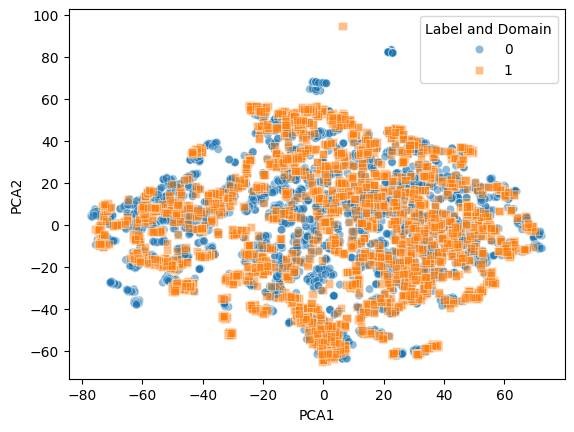

In [45]:
# get the embeddings for k=9 case
train_domain = domains
test_domain = []

train_embeddings, train_labels, test_embeddings, test_labels = get_embeddings(
    train_domain, test_domain, sequence_length
)
plot_embeddings(train_embeddings, train_labels, test_embeddings, test_labels)

In [74]:
print("Kernel Density with k=9 ", density_estimation(train_embeddings, test_embeddings))

Kernel Density with k=9  86.82629599122129
